Expectation value of Z1Z2: [ 1.  1.  1.  1.  1.  1.  1.  1. -1.  1.]
Expectation value of Z1Z3: [ 1.  1.  1.  1.  1.  1.  1.  1. -1.  1.]


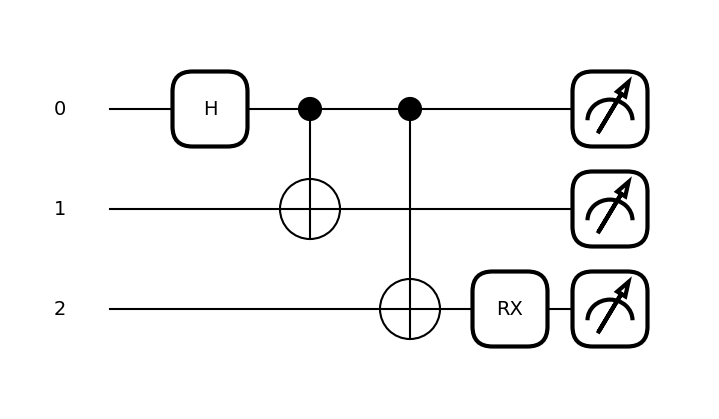

Probabilities of states after applying weak error:


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [24]:
# Importing necessary libraries
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the number of qubits
n_qubits = 3

# Initialize a device
dev = qml.device('default.qubit', wires=n_qubits, shots=10)

# Define the initial state preparation function
def initial_state():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])

# Define the weak error function
def apply_weak_error():
    # Randomly select one of the three qubits
    qubit_to_flip = random.randint(0, 2)
    # Apply a small rotation around the X axis to simulate a weak bit-flip error
    epsilon = np.pi /3
    qml.RX(epsilon, wires=qubit_to_flip)

def plot_circuit_and_probs(circuit, *args, description=""):
    # Execute the circuit to obtain the probabilities
    probs = circuit(*args)
    # Calculate the squared magnitude of each probability amplitude
    squared_probs = np.abs(probs)**2
    # Draw the circuit
    fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(*args)
    plt.show()
    # Print the probabilities
    print(f"Probabilities of states after {description}:")
    for i, p in enumerate(squared_probs):
        print(f"State |{i:03b}⟩: {p:.4f}")
    print("\n")

def apply_Z1_Z2():
    qml.PauliZ(wires=0)
    qml.PauliZ(wires=1)

def apply_Z1_Z3():
    qml.PauliZ(wires=0)
    qml.PauliZ(wires=2)

# Define the quantum node


@qml.qnode(dev)
def circuit():
    initial_state()
    apply_weak_error()
    return qml.sample(qml.PauliZ(0) @ qml.PauliZ(1)), qml.sample(qml.PauliZ(0) @ qml.PauliZ(2))

# Execute the circuit
Z1Z2, Z1Z3 = circuit()

# Print the results
print(f"Expectation value of Z1Z2: {Z1Z2}")
print(f"Expectation value of Z1Z3: {Z1Z3}")

# Plot the circuit and the probabilities
plot_circuit_and_probs(circuit, description="applying weak error")